In [13]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pickle
%matplotlib inline

In [4]:
training_file = 'traffic_sign_data/train.p'
testing_file = 'traffic_sign_data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)

    
X_train_original, y_train_original = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

In [5]:

def augment_brightness(img):
    img = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
    img = np.array(img, dtype=np.float64)
    random_bright = 1+np.random.uniform()
    img[:,:,2] = img[:,:,2]*random_bright
    img[:,:,2][img[:,:,2]>255]  = 255
    img = np.array(img, dtype = np.uint8)
    img = cv2.cvtColor(img,cv2.COLOR_HSV2RGB)
    return img


In [6]:
def image_translation(img):
    rows,cols,_ = img.shape
    
    # allow translation up to 3 pixels in x and y directions
    dx,dy = np.random.randint(-3,3,2)

    M = np.float32([[1,0,dx],[0,1,dy]])
    translated = cv2.warpAffine(img,M,(cols,rows))
    
    #translated = translated[:,:,np.newaxis]
    return translated

In [7]:
def image_warp(img):
    rows,cols,_ = img.shape

    # starting points for transform
    x1 = 8
    x2 = 24
    y1 = 8
    y2 = 24

    pts1 = np.float32([[y1,x1],[y2,x1],[y1,x2]])
    
    pt1 = 8+4*np.random.uniform()-4
    pt2 = 24+4*np.random.uniform()-4
    pts2 = np.float32([[pt1,x1],[pt2,pt1],[y1,pt2]])

    
    M = cv2.getAffineTransform(pts1,pts2)

    warped = cv2.warpAffine(img,M,(cols,rows))
    
    
    return warped

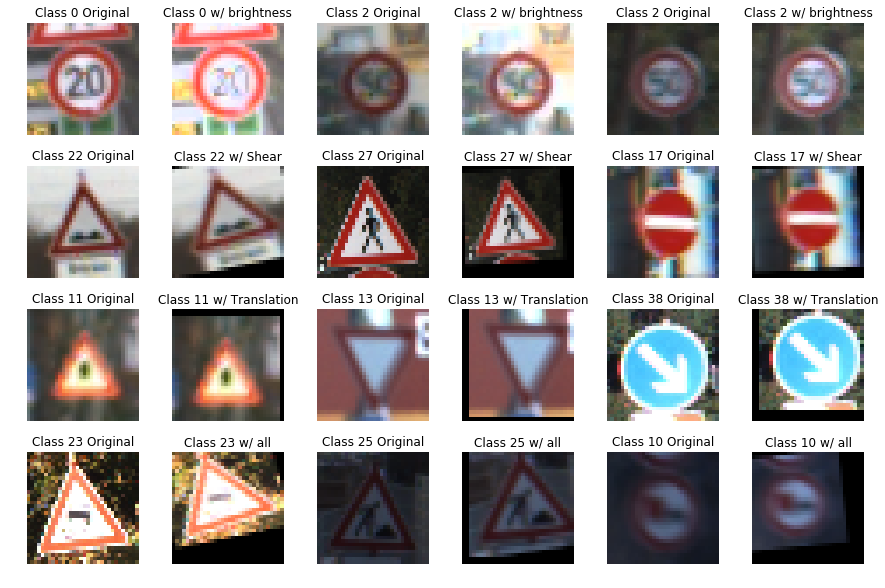

In [19]:
def visualize_augmentation_example(images, labels):
    fig, axes = plt.subplots(nrows=4, ncols=6, figsize=(15,10))
    fig.subplots_adjust(hspace = .25, wspace=.3)
    axs = axes.ravel()

    for i in range(0,5,2):
        index = np.random.randint(0,len(images))
        img = images[index]
        new_img = augment_brightness(img)
        axs[i].imshow(img)
        axs[i].axis('off')
        axs[i].set_title("Class %d Original" % labels[index])
        axs[i+1].imshow(new_img)
        axs[i+1].axis('off')
        axs[i+1].set_title("Class %d w/ brightness" % labels[index]) 
    for i in range(6,11,2):
        index = np.random.randint(0,len(images))
        img = images[index]
        new_img = image_warp(img)
        axs[i].imshow(img)
        axs[i].axis('off')
        axs[i].set_title("Class %d Original" % labels[index])
        axs[i+1].imshow(new_img)
        axs[i+1].axis('off')
        axs[i+1].set_title("Class %d w/ Shear" % labels[index]) 
    for i in range(12,17,2):
        index = np.random.randint(0,len(images))
        img = images[index]
        new_img = image_translation(img)
        axs[i].imshow(img)
        axs[i].axis('off')
        axs[i].set_title("Class %d Original" % labels[index])
        axs[i+1].imshow(new_img)
        axs[i+1].axis('off')
        axs[i+1].set_title("Class %d w/ Translation" % labels[index])
    for i in range(18,23,2):
        index = np.random.randint(0,len(images))
        img = images[index]
        new_img = image_translation(image_warp(augment_brightness(img)))
        axs[i].imshow(img)
        axs[i].axis('off')
        axs[i].set_title("Class %d Original" % labels[index])
        axs[i+1].imshow(new_img)
        axs[i+1].axis('off')
        axs[i+1].set_title("Class %d w/ all" % labels[index]) 
    plt.show()
    
visualize_augmentation_example(X_train_original, y_train_original)

In [ ]:
def augment_data(images, labels):
    length = len(images)
    for i in range(length):
        print(i, "/", length)
        img = images[i]
        label = labels[i]
        for j in range(3):
            new_img = image_translation(image_warp(augment_brightness(img)))
            images = np.concatenate((images, [new_img]), axis=0)
            labels = np.concatenate((labels, [label]), axis=0)


    dist_pickle = {}
    dist_pickle["features"] = images
    dist_pickle["labels"] = labels
    pickle.dump(dist_pickle, open("traffic_sign_data/train_augmented.p", "wb"))
    
    
    # Number of training examples
    print("Number of training examples =", len(images))

    fig, axes = plt.subplots(nrows=1, ncols=1)
    axes.hist(labels, 43)
    axes.set_xlabel('Sign #')
    axes.set_ylabel('# seen in training set')
    axes.set_title('Training set distribution')
    plt.show()
    
    return images, labels
    
#X_train, y_train = create_additional_data(X_train, y_train)